<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/FII_signals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install yfinance

     |████████████████████████████████| 6.3 MB 31.1 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=235ad5667a0dd97661c1dcc194f9029cbef7135889307124d4685844b18d7a2b
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


[*********************100%***********************]  1 of 1 completed


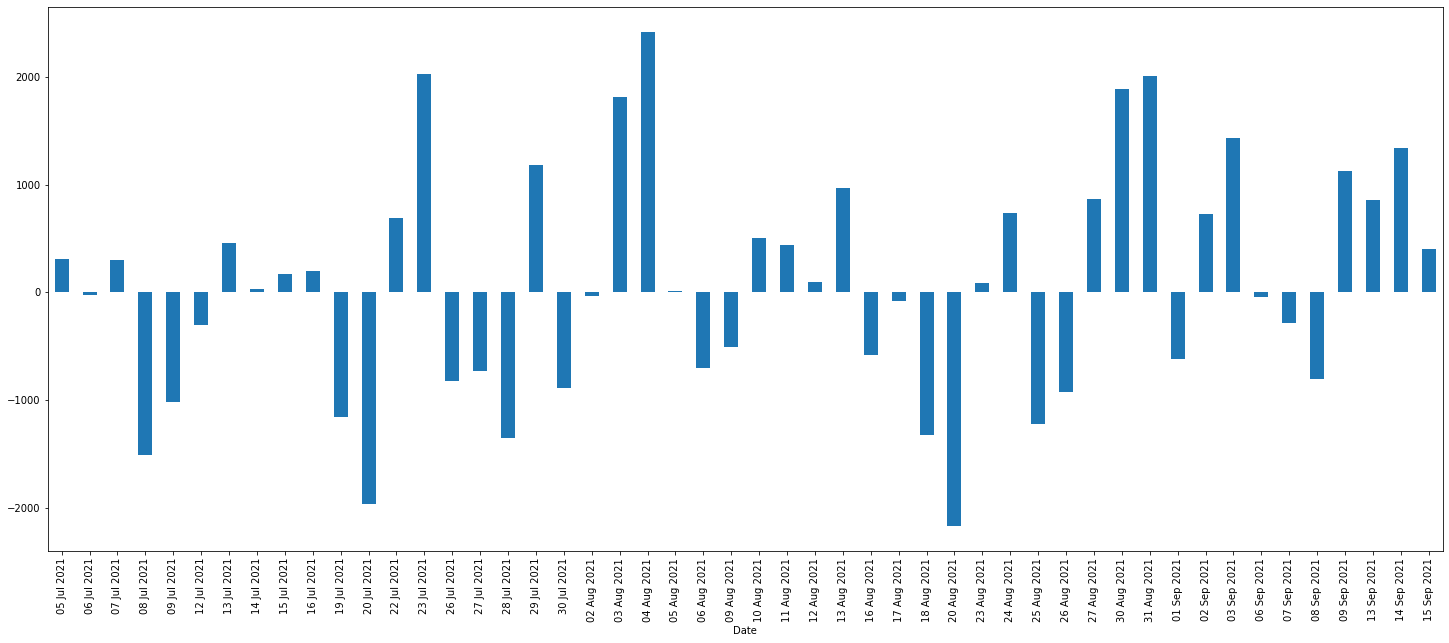

In [3]:

import yfinance as yf
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.simplefilter(action='ignore', category=Warning)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
import pandas as pd

nifty=yf.download('^NSEI',start='2018-08-08')
nif=nifty.reset_index()

import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, YearLocator

content='https://raw.githubusercontent.com/anirbanghoshsbi/data/main/'

data1=pd.read_csv(content+'fii1.txt',sep='\t',header=None)
data2=pd.read_csv(content+'fii2.txt',sep='\t',header=None)
data3=pd.read_csv(content+'fii3.txt',sep='\t',header=None)
data4=pd.read_csv(content+'fii4.txt',sep='\t',header=None)
data5=pd.read_csv(content+'fii5.txt',sep='\t',header=None)
data6=pd.read_csv(content+'fii6.txt',sep='\t',header=None)
data7=pd.read_csv(content+'fii7.txt',sep='\t',header=None)
data8=pd.read_csv(content+'fii8.txt',sep='\t',header=None)

data=[]

data=data1[0].tolist()
data.extend(data2[0].tolist())
data.extend(data3[0].tolist())
data.extend(data4[0].tolist())
data.extend(data5[0].tolist())
data.extend(data6[0].tolist())
data.extend(data7[0].tolist())
data.extend(data8[0].tolist())

len(data)

lst=[]
lst.append(data[0:7])

for i in range(7,len(data)):
  if i%7==0:
    #print(i)
    lst.append(data[i:i+7])

df=pd.DataFrame()

for item in lst:
  to_append=item
  a_series = pd.Series(to_append)
  df = df.append(a_series, ignore_index=True)

df.to_csv('fii.csv')

fii_fig= pd.read_csv('/content/fii.csv')



fii_fig=fii_fig[::-1]

fii_fig.columns =['Index','Date','FIIcall','FIIput','FIIFuture','FIIFutOI','FIICash','DIIcash']
#fii.columns =['Index','Date','FIIcall','FIIput','FIIFuture','FIIFutOI','FIICash','DIIcash']

fii_fig.drop('Index',inplace=True,axis=1)

fii_fig=fii_fig.set_index('Date')




fii_fig['Cash']=fii_fig.FIICash+fii_fig.DIIcash





plt.figure(figsize=(25,10))
fii_fig['Cash'][-50:].plot.bar()
plt.show()





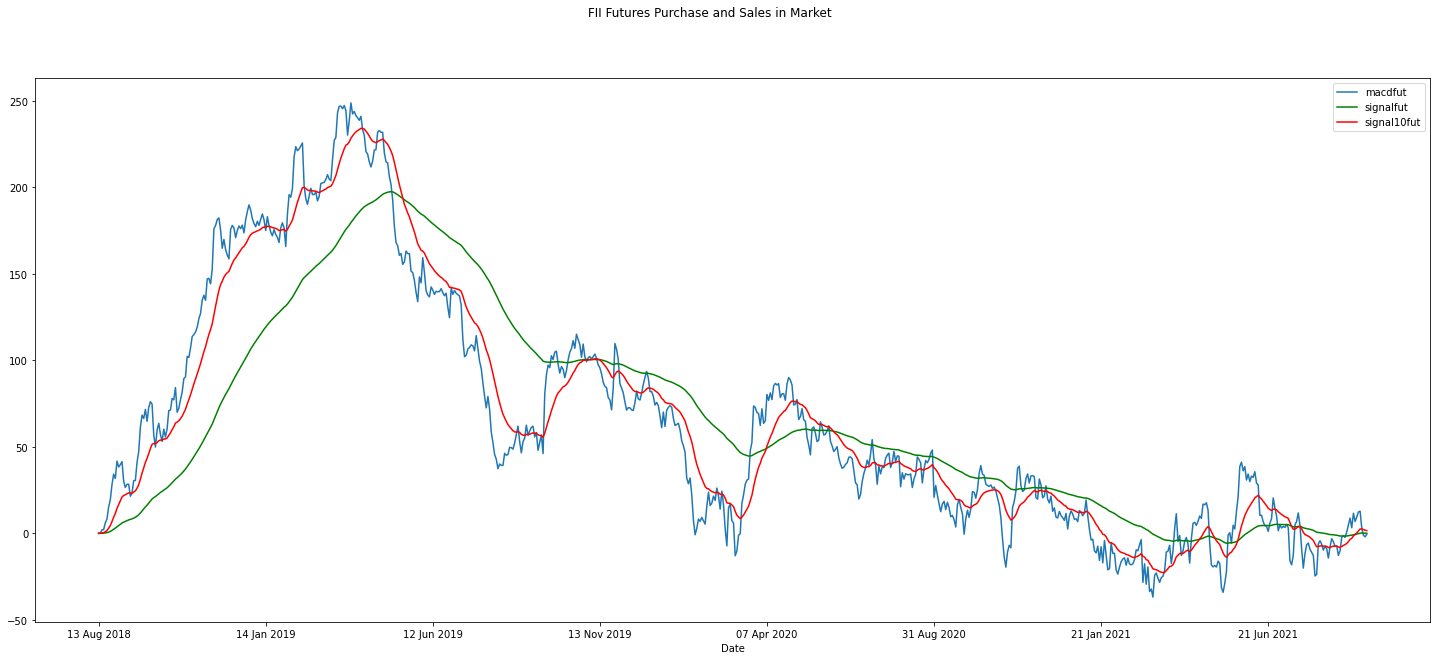

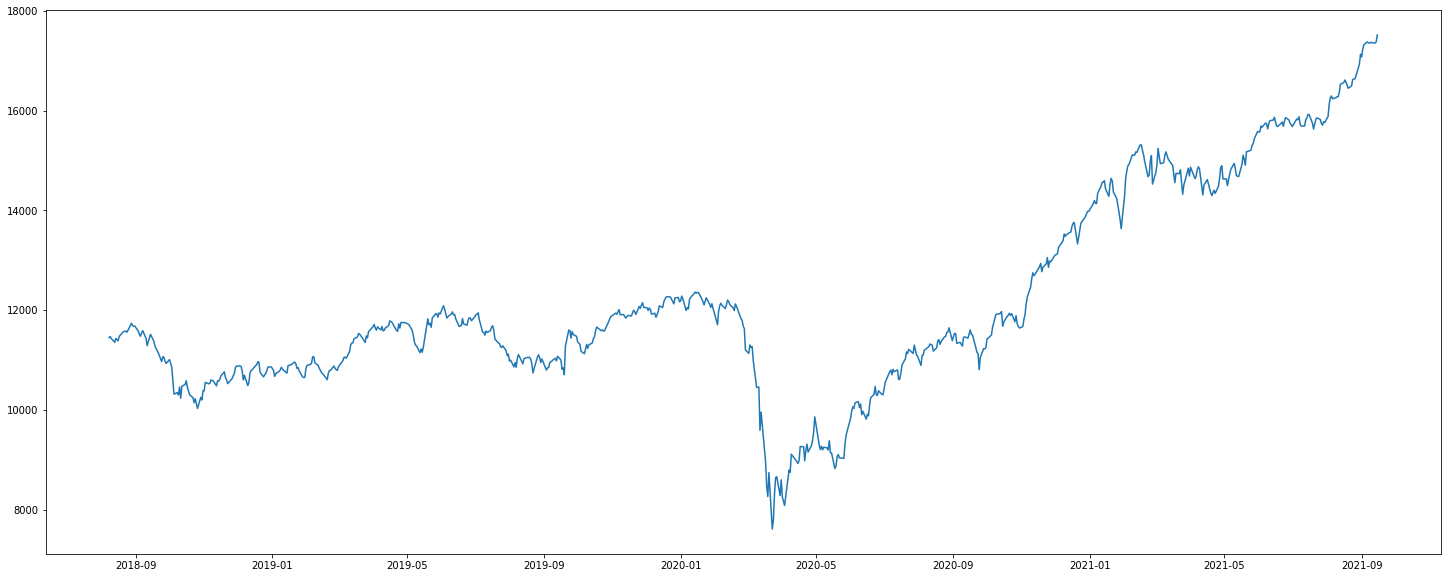

In [4]:

fii_fig['macdfut']=fii_fig['FIIFuture'].ewm(span=150, adjust=False).mean()-fii_fig['FIIFuture'].ewm(span=300, adjust=False).mean()
fii_fig['signalfut']=fii_fig['macdfut'].ewm(span=95,adjust=False).mean()
fii_fig['signal10fut']=fii_fig['macdfut'].ewm(span=20,adjust=False).mean()
fii_fig['histfut']=fii_fig['macdfut']-fii_fig['signalfut']

fii_fig['macdfut'].plot(figsize=(25,10))
fii_fig['signalfut'].plot(color='g')
fii_fig['signal10fut'].plot(color='r')
#plt.plot(fii_fig.loc[:, :].index)
plt.suptitle('FII Futures Purchase and Sales in Market')
plt.legend()
plt.show()
plt.figure(figsize=(25,10))
plt.plot(nifty.Close)
plt.show()


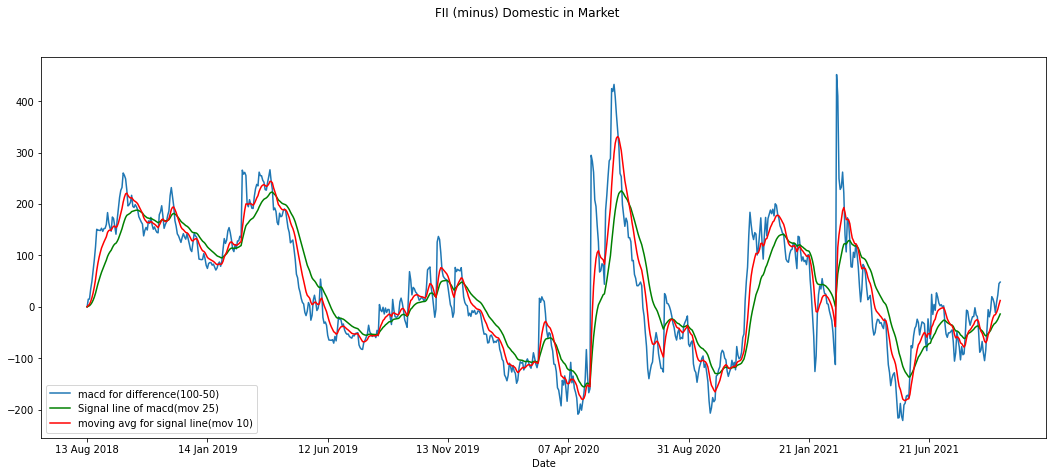

In [5]:
"""# Plot FII minus DII"""

fii_fig['macdy']=fii_fig['Cash'].ewm(span=50, adjust=False).mean()-fii_fig['Cash'].ewm(span=100, adjust=False).mean()
fii_fig['signaly']=fii_fig['macdy'].ewm(span=25,adjust=False).mean()
fii_fig['signal10y']=fii_fig['macdy'].ewm(span=10,adjust=False).mean()
fii_fig['histy']=fii_fig['macdy']-fii_fig['signaly']

fii_fig['macdy'].plot(figsize=(18,7),label= 'macd for difference(100-50)')
fii_fig['signaly'].plot(color='g',label='Signal line of macd(mov 25)')
fii_fig['signal10y'].plot(color='r',label='moving avg for signal line(mov 10)')
#plt.plot(fii_fig.loc[:, :].index)
plt.suptitle('FII (minus) Domestic in Market')
plt.legend(loc='lower left')
plt.show()


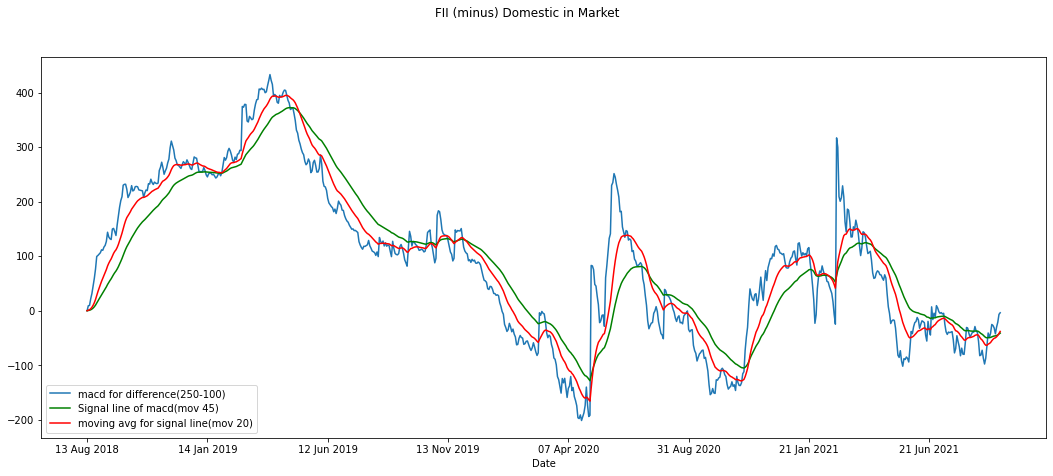

In [6]:
fii_fig['macdy']=fii_fig['Cash'].ewm(span=100, adjust=False).mean()-fii_fig['Cash'].ewm(span=250, adjust=False).mean()
fii_fig['signaly']=fii_fig['macdy'].ewm(span=45,adjust=False).mean()
fii_fig['signal10y']=fii_fig['macdy'].ewm(span=20,adjust=False).mean()
fii_fig['histy']=fii_fig['macdy']-fii_fig['signaly']

fii_fig['macdy'].plot(figsize=(18,7),label= 'macd for difference(250-100)')
fii_fig['signaly'].plot(color='g',label='Signal line of macd(mov 45)')
fii_fig['signal10y'].plot(color='r',label='moving avg for signal line(mov 20)')
#plt.plot(fii_fig.loc[:, :].index)
plt.suptitle('FII (minus) Domestic in Market')
plt.legend(loc='lower left')
plt.show()

In [7]:

fii_fig['macd']=fii_fig['DIIcash'].ewm(span=50, adjust=False).mean()-fii_fig['DIIcash'].ewm(span=200, adjust=False).mean()
fii_fig['signal']=fii_fig['macd'].ewm(span=35,adjust=False).mean()
fii_fig['signal10']=fii_fig['macd'].ewm(span=10,adjust=False).mean()
fii_fig['hist']=fii_fig['macd']-fii_fig['signal']

fii_fig['macdx']=fii_fig['FIICash'].ewm(span=50, adjust=False).mean()-fii_fig['FIICash'].ewm(span=200, adjust=False).mean()
fii_fig['signalx']=fii_fig['macdx'].ewm(span=35,adjust=False).mean()
fii_fig['signal10x']=fii_fig['macdx'].ewm(span=10,adjust=False).mean()
fii_fig['histx']=fii_fig['macdx']-fii_fig['signalx']

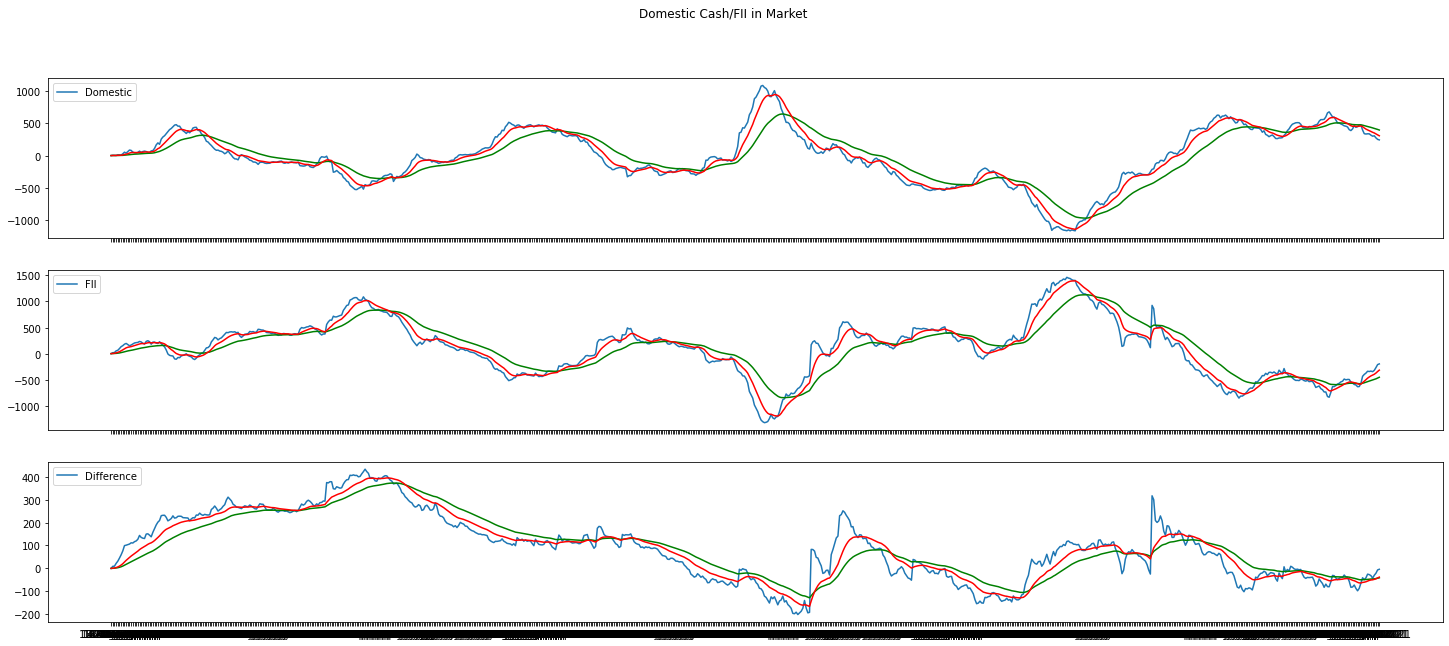

No handles with labels found to put in legend.


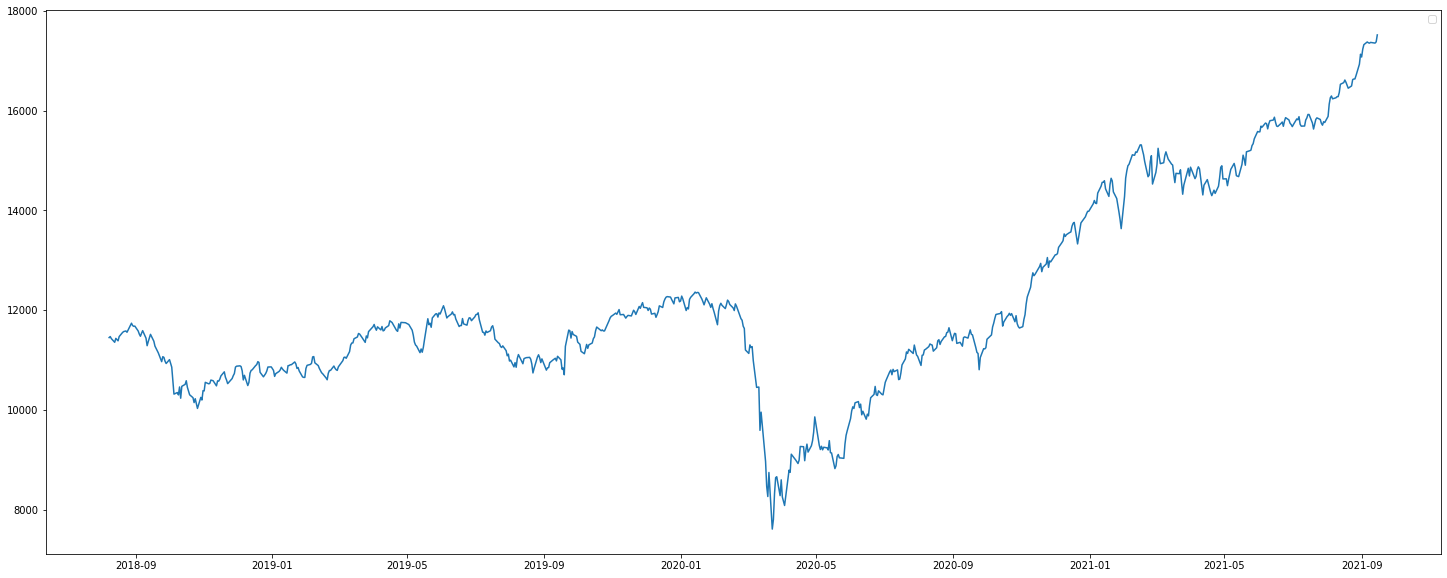

In [8]:

"""# Plot FII , DII , Difference comparison"""

fig,ax=plt.subplots(3,1,figsize=(25,10),sharex=True)
ax[0].plot(fii_fig['macd'], label='Domestic')
ax[0].plot(fii_fig['signal'],color='g')
ax[0].plot(fii_fig['signal10'],color='r')
ax[2].plot(fii_fig['macdy'],label='Difference')
ax[2].plot(fii_fig['signaly'],color='g')
ax[2].plot(fii_fig['signal10y'],color='r')
#plt.plot(fii_fig.loc[:, :].index)
ax[1].plot(fii_fig['macdx'],label='FII')
ax[1].plot(fii_fig['signalx'],color='g')
ax[1].plot(fii_fig['signal10x'],color='r')

#plt.plot(fii_fig.loc[:, :].index)
plt.suptitle('Domestic Cash/FII in Market')
ax[0].legend(loc='upper left')
ax[1].legend(loc='upper left')
ax[2].legend(loc='upper left')
plt.show()
plt.figure(figsize=(25,10))
plt.plot(nifty.Close)
#plt.xaxis.set_major_locator(mloc)
plt.legend()
plt.show()

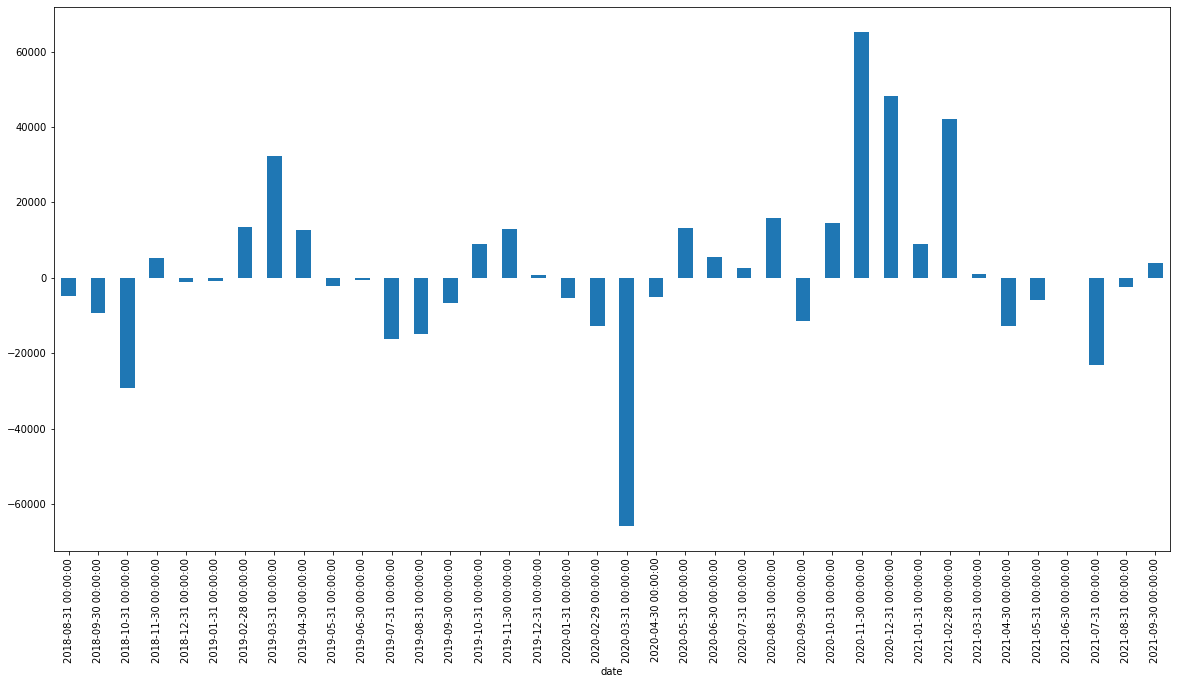

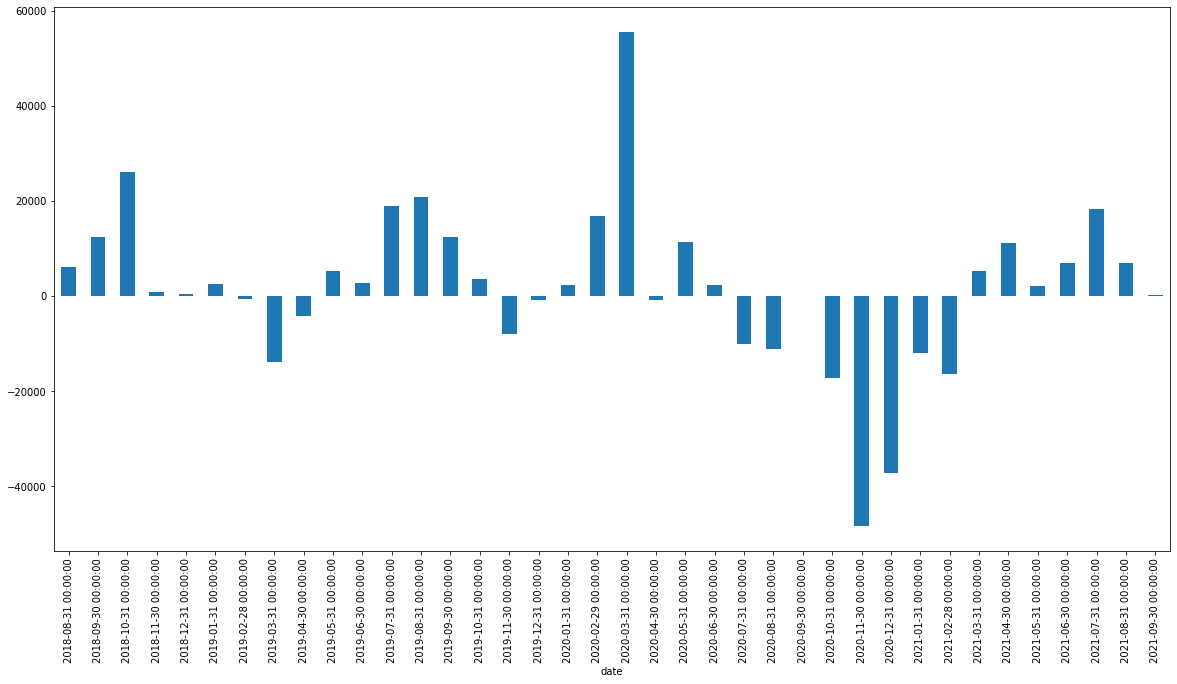

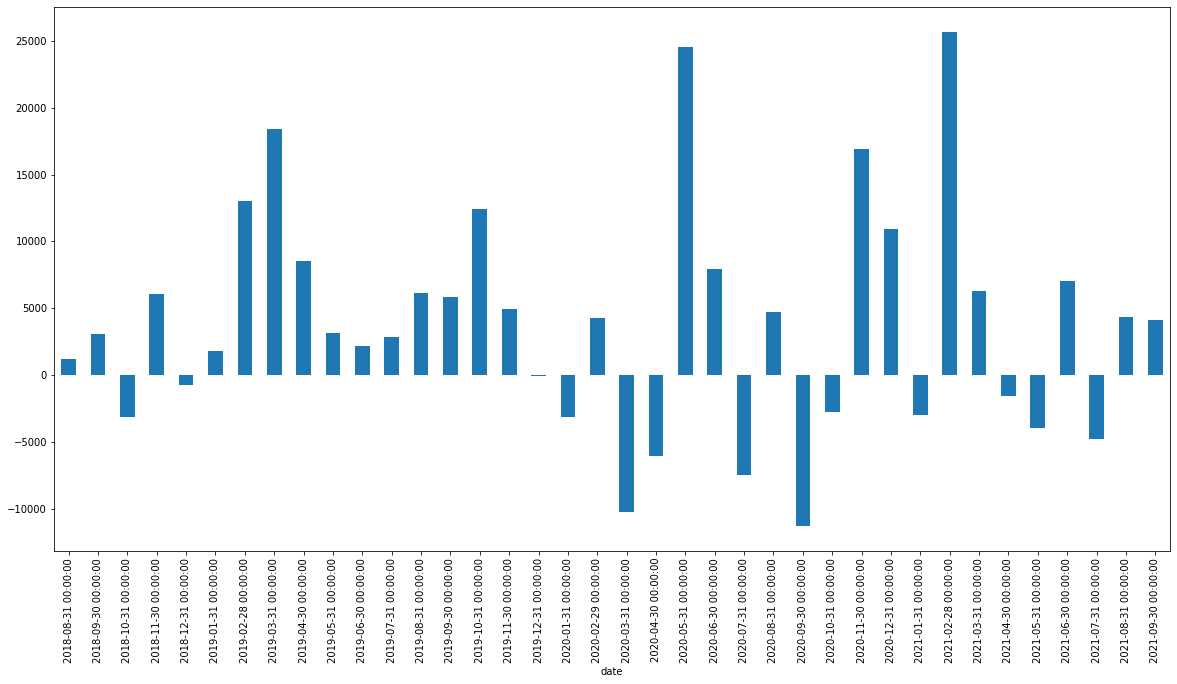

In [9]:

fii_fig.tail(2)

fii_fig=fii_fig.reset_index()
fii_fig['date']=pd.to_datetime(fii_fig['Date'])
fii_fig = fii_fig.set_index('date')
fii_fig.FIICash.resample('M').sum().plot(kind='bar',figsize=(20,10))
plt.show()

fii_fig.DIIcash.resample('M').sum().plot(kind='bar',figsize=(20,10))
plt.show()

fii_fig.Cash.resample('M').sum().plot(kind='bar',figsize=(20,10))
plt.show()

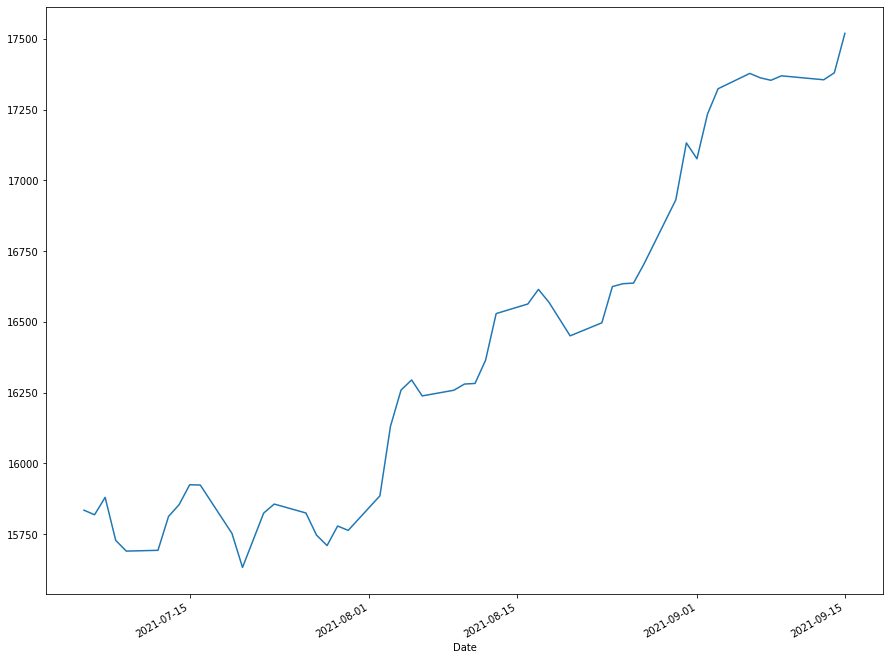

In [10]:

nifty['Close'][-50:].plot(figsize=(15,12))

fii_fig['MA200']=fii_fig.FIICash.rolling(window=200).mean()
fii_fig['MA50']=fii_fig.FIICash.rolling(window=50).mean()

fii_fig['macd']=fii_fig['FIICash'].ewm(span=50, adjust=False).mean()-fii_fig['FIICash'].ewm(span=200, adjust=False).mean()
fii_fig['signal']=fii_fig['macd'].ewm(span=35,adjust=False).mean()
fii_fig['signal10']=fii_fig['macd'].ewm(span=10,adjust=False).mean()
fii_fig['hist']=fii_fig['macd']-fii_fig['signal']

fii_fig['macd_dom']=fii_fig['DIIcash'].ewm(span=100, adjust=False).mean()-fii_fig['DIIcash'].ewm(span=200, adjust=False).mean()
fii_fig['signal_dom']=fii_fig['DIIcash'].ewm(span=50,adjust=False).mean()
fii_fig['hist_dom']=fii_fig['macd_dom']-fii_fig['signal_dom']

# sample dataset from plotly express
df = fii_fig
# Filter and pivot dataset for each country,
# and add lines for each country
fig = go.Figure()
for c in ['macd','signal']:
    fig.add_traces(go.Scatter(x=df.index, y=df[c], mode='lines', name = c))

fig.show()


In [11]:

"""# Plot Smart Money (FII)"""

from plotly.subplots import make_subplots
df=fii_fig.reset_index()
fig = make_subplots(
    rows=2, cols=1,shared_xaxes=True,vertical_spacing=0.02,
    subplot_titles=("Smart Money","Nifty"))

fig.add_trace(go.Scatter(x=df.Date, y=df['macd'], mode='lines', name = 'macd'),
              row=1, col=1)

fig.add_trace(go.Scatter(x=df.Date, y=df['signal'], mode='lines', name = 'signal'),
              row=1, col=1)
fig.add_trace(go.Scatter(x=df.Date, y=df['signal10'], mode='lines', name = 'signal10'),
              row=1, col=1)
fig.add_trace(go.Scatter(x=nif.Date, y=nif['Close'], mode='lines', name = 'Close'),
              row=2, col=1)

fig.update_layout(height=500, width=900,
                  title_text="Smart Money And Nifty")

fig.show()


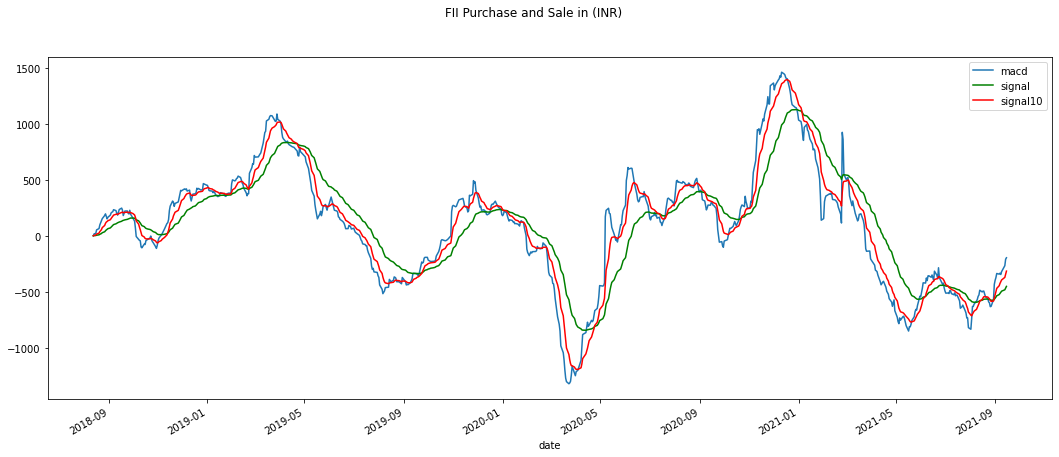

In [12]:

fii_fig['macd'].plot(figsize=(18,7))
fii_fig['signal'].plot(color='g')
fii_fig['signal10'].plot(color='r')
#plt.plot(fii_fig.loc[:, :].index)
plt.suptitle('FII Purchase and Sale in (INR)')
plt.legend()
plt.show()

In [13]:
fii_fig['fsig']=np.where(fii_fig['macdx']>fii_fig['signalx'],1,0)
fii_fig['fsig10']=np.where(fii_fig['macdx']>fii_fig['signal10x'],1,0)
fii_fig['fsig_d']=np.where(fii_fig['macd']>fii_fig['signal'],1,0)
fii_fig['fsig10_d']=np.where(fii_fig['macd']>fii_fig['signal10'],1,0)

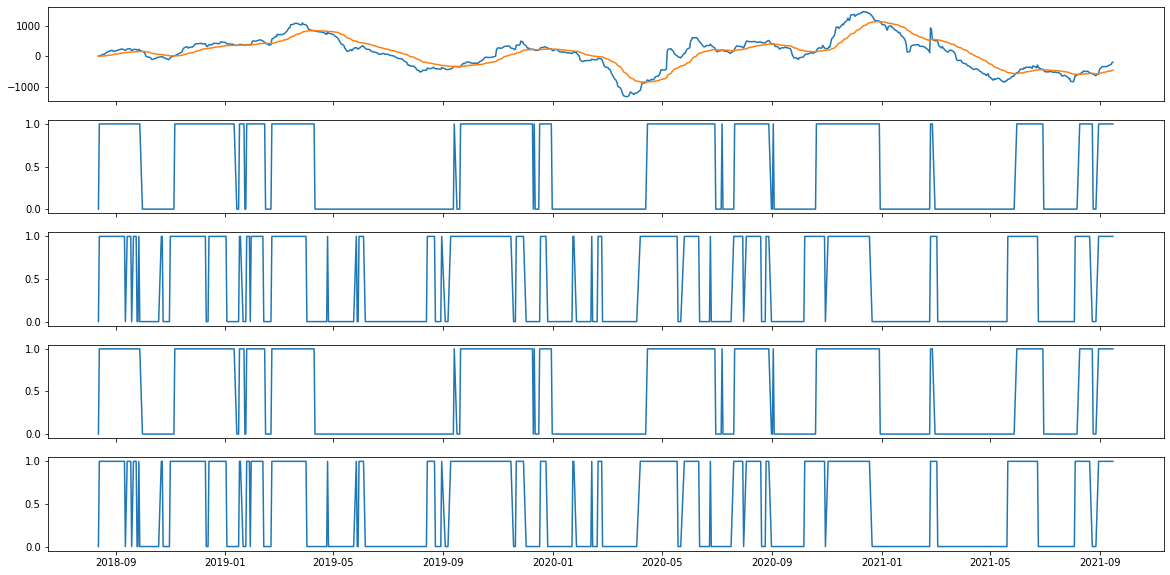

In [14]:

fig, ax = plt.subplots(5,1,figsize=(20,10),sharex=True)
ax[0].plot(fii_fig.loc[:, :].index,fii_fig['macdx'],label='MACD')
ax[0].plot(fii_fig.loc[:, :].index,fii_fig['signalx'],label='Signal')
ax[1].plot(fii_fig.loc[:, :].index,fii_fig['fsig'],label='Buy-Sell')
ax[2].plot(fii_fig.loc[:, :].index,fii_fig['fsig10'],label='Buy-Sell')
ax[3].plot(fii_fig.loc[:, :].index,fii_fig['fsig_d'],label='Buy-Sell')
ax[4].plot(fii_fig.loc[:, :].index,fii_fig['fsig10_d'],label='Buy-Sell')
#plt.plot(fii_fig.loc[:, :].index)
plt.show()





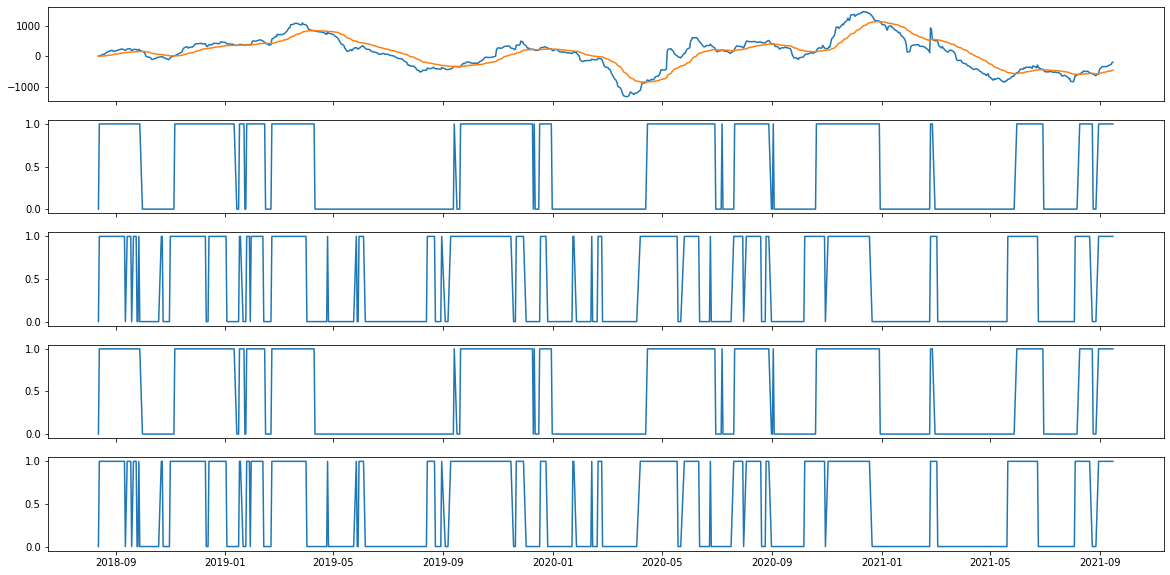

In [15]:

fig, ax = plt.subplots(5,1,figsize=(20,10),sharex=True)
ax[0].plot(fii_fig.loc[:, :].index,fii_fig['macd'],label='MACD')
ax[0].plot(fii_fig.loc[:, :].index,fii_fig['signal'],label='Signal')
ax[1].plot(fii_fig.loc[:, :].index,fii_fig['fsig'],label='Buy-Sell')
ax[2].plot(fii_fig.loc[:, :].index,fii_fig['fsig10'],label='Buy-Sell')
ax[3].plot(fii_fig.loc[:, :].index,fii_fig['fsig_d'],label='Buy-Sell')
ax[4].plot(fii_fig.loc[:, :].index,fii_fig['fsig10_d'],label='Buy-Sell')
#plt.plot(fii_fig.loc[:, :].index)
plt.show()


In [16]:
fii=fii_fig.reset_index()
# download nifty price and concat with fii data
fii=fii.join(nif.Close)
#fii.Close=fii.Close.shift(1)


In [17]:
fii.tail(2)

,date,Date,FIIcall,FIIput,FIIFuture,FIIFutOI,FIICash,DIIcash,Cash,macdfut,signalfut,signal10fut,histfut,macdy,signaly,signal10y,histy,macd,signal,signal10,hist,macdx,signalx,signal10x,histx,MA200,MA50,macd_dom,signal_dom,hist_dom,fsig,fsig10,fsig_d,fsig10_d,Close
758,2021-09-14,14 Sep 2021,-17.4,0.3,-197,15377,1650,-310,1340,-2.030635,0.069335,1.779037,-2.099971,-6.671469,-42.836572,-41.651671,36.165103,-210.216105,-467.961961,-342.871043,257.745856,-210.216105,-467.961961,-342.871043,257.745856,393.165,-415.50,202.670963,358.457229,-155.786266,1,1,1,1,17519.449219
759,2021-09-15,15 Sep 2021,40.5,-24.8,171,15940,233,168,401,-0.507879,0.057310,1.561235,-0.565189,-3.797775,-41.139233,-38.046538,37.341459,-196.902622,-452.903109,-316.331330,256.000487,-196.902622,-452.903109,-316.331330,256.000487,370.640,-391.18,199.249160,350.988318,-151.739158,1,1,1,1,NaN


In [18]:
fii=fii[['date','fsig','fsig10','Close']]

In [19]:
fii=fii.set_index('date')

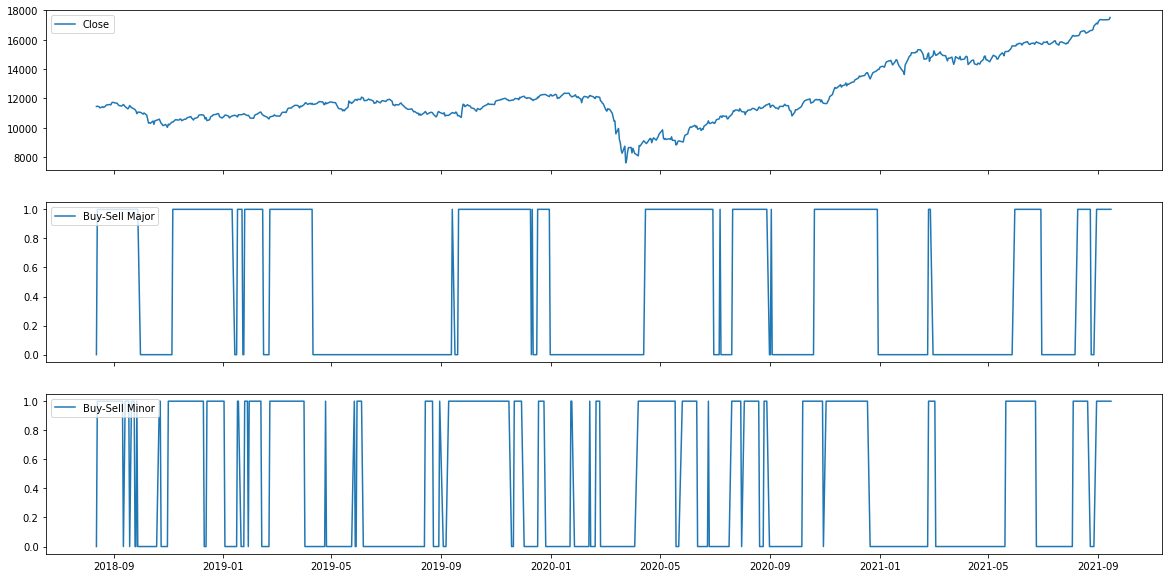

In [20]:
fig, ax = plt.subplots(3,1,figsize=(20,10),sharex=True)
ax[0].plot(fii.loc[:, :].index,fii['Close'],label='Close')
ax[1].plot(fii.loc[:, :].index,fii['fsig'],label='Buy-Sell Major')
ax[2].plot(fii.loc[:, :].index,fii_fig['fsig10'],label='Buy-Sell Minor')
ax[0].legend(loc='upper left')
ax[1].legend(loc='upper left')
ax[2].legend(loc='upper left')
plt.show()